In [1]:
import pandas as pd
import pandas_datareader as pdr

# Read data from iex

In [2]:
msft = pdr.DataReader('MSFT', 'iex', start = '2017-05-01', end = '2018-04-30')
msft = msft.rename(index = {i: pd.datetime(int(i[:4]), int(i[5:7]), int(i[8:10])) for i in msft.index.values.tolist()})

ma = msft.apply(lambda x: x.shift(1).rolling(5).mean()).dropna()

2y


What does lambda function do?

In [3]:
import numpy as np
from sklearn import metrics

y = np.array(msft['close'][5:])
y_pred = np.array(ma['close'])

sst = np.sum((y - np.mean(y)) ** 2)
sse = np.sum((y_pred - y) ** 2)

metrics.r2_score(y, y_pred)

0.9765834125063859

# Question: is the above machine learning?

In [4]:
x1 = msft['close'].shift(1).dropna().reshape(-1, 1)
y1 = msft['close'][1:]

from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(x1, y1)

print('Coefficients:', regr1.coef_)
print('Intercept:', regr1.intercept_)

Coefficients: [0.99271719]
Intercept: 0.6826880764275955


In [5]:
x5 = np.column_stack((msft.shift(1)['close'],
                      msft.shift(2)['close'],
                      msft.shift(3)['close'],
                      msft.shift(4)['close'],
                      msft.shift(5)['close']))[5:]
y5 = msft['close'][5:]

regr5 = linear_model.LinearRegression()
regr5.fit(x5, y5)

print('Coefficients:', regr5.coef_)
print('Intercept:', regr5.intercept_)

sst = np.sum((y5 - np.mean(y5)) ** 2)
ssr = np.sum((regr5.predict(x5) - np.mean(y5)) ** 2)
sse = np.sum((regr5.predict(x5) - y5) ** 2)

Coefficients: [ 0.7777411  -0.0032332   0.34822906 -0.07316233 -0.05462861]
Intercept: 0.5394291394868702


In [6]:
sst = np.sum((y5 - np.mean(y5)) ** 2)
ssr = np.sum((regr5.predict(x5) - np.mean(y5)) ** 2)
sse = np.sum((regr5.predict(x5) - y5) ** 2)

print('Total sum of squares:', sst)
print('Explained sum of squares:', ssr)
print('Residual sum of squares:', sse)
print('R^2 score computed from score function:', regr5.score(x5, y5))
print('R^2 score computed from ssr / sst:', ssr / sst)

Total sum of squares: 21782.040367781614
Explained sum of squares: 21471.09138419769
Residual sum of squares: 310.94898358379237
R^2 score computed from score function: 0.985724524501216
R^2 score computed from ssr / sst: 0.98572452450121


In [7]:
from sklearn import model_selection

x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1, y1, test_size = 0.2, random_state = 2018)
regr1.fit(x1_train, y1_train)
print('R^2 score', regr1.score(x1_test, y1_test))

R^2 score 0.9850655652050999


In [8]:
x5_train, x5_test, y5_train, y5_test = model_selection.train_test_split(x5, y5, test_size = 0.2, random_state = 2018)
regr5.fit(x5_train, y5_train)
print('R^2 score', regr5.score(x5_test, y5_test))

R^2 score 0.9816057351721832


can we compare regr1 and regr5?

In [9]:
x1 = msft['close'].shift(1)[5:].reshape(-1, 1)
y1 = msft['close'][5:]

x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1, y1, test_size = 0.2, random_state = 2018)
regr1.fit(x1_train, y1_train)
print('R^2 score', regr1.score(x1_test, y1_test))

R^2 score 0.9794486355109092


In [10]:
x5_train, x5_test, y5_train, y5_test = model_selection.train_test_split(x5, y5, test_size = 0.2, random_state = 2018)
regr5.fit(x5_train, y5_train)
print('R^2 score', regr5.score(x5_test, y5_test))

R^2 score 0.9816057351721832


In [11]:
from sklearn import metrics

y1_pred = regr1.predict(x1_test)
print('metrics.r2_score:', metrics.r2_score(y1_test, y1_pred))
print('metrics.explained_variance_score:', metrics.explained_variance_score(y1_test, y1_pred))
print('metrics.mean_absolute_error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('metrics.mean_squared_error:', metrics.mean_squared_error(y1_test, y1_pred))

metrics.r2_score: 0.9794486355109092
metrics.explained_variance_score: 0.9799389127832114
metrics.mean_absolute_error: 0.8531271588011166
metrics.mean_squared_error: 1.6836639004467957


In [12]:
y5_pred = regr5.predict(x5_test)
print('metrics.r2_score:', metrics.r2_score(y5_test, y5_pred))
print('metrics.explained_variance_score:', metrics.explained_variance_score(y5_test, y5_pred))
print('metrics.mean_absolute_error:', metrics.mean_absolute_error(y5_test, y5_pred))
print('metrics.mean_squared_error:', metrics.mean_squared_error(y5_test, y5_pred))

metrics.r2_score: 0.9816057351721832
metrics.explained_variance_score: 0.9817729472339569
metrics.mean_absolute_error: 0.8626611463877247
metrics.mean_squared_error: 1.5069442071495058


# Polynomial models

In [13]:
from sklearn import preprocessing

poly2 = preprocessing.PolynomialFeatures(2)
poly3 = preprocessing.PolynomialFeatures(3)

x5_train2 = poly2.fit_transform(x5_train)
x5_test2 = poly2.fit_transform(x5_test)
x5_train3 = poly3.fit_transform(x5_train)
x5_test3 = poly3.fit_transform(x5_test)

regr2 = linear_model.LinearRegression()
regr3 = linear_model.LinearRegression()

regr2.fit(x5_train2, y5_train)
print('R^2 score with poly2', regr2.score(x5_test2, y5_test))

regr3.fit(x5_train3, y5_train)
print('R^2 score with poly3', regr3.score(x5_test3, y5_test))

R^2 score with poly2 0.9822710506564545
R^2 score with poly3 0.9631610712586139


# Linear Regression Visualization

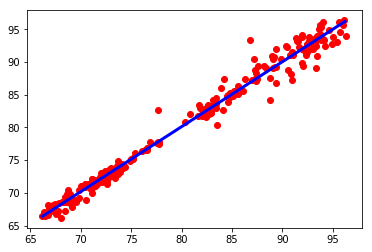

In [14]:
import matplotlib.pyplot as plt

regr1.fit(x1, y1)
plt.scatter(x1, y1, color = 'red')
lx = np.arange(min(x1), max(x1), (max(x1) - min(x1)) / 200).reshape(200, 1)
plt.plot(lx, regr1.predict(lx), color='blue', linewidth = 3)
plt.show()

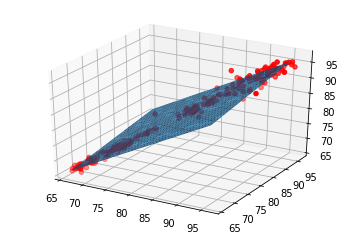

In [15]:
from mpl_toolkits.mplot3d import Axes3D

x2 = np.column_stack((msft.shift(1)['close'],
                      msft.shift(2)['close']))[2:]
y2 = msft['close'][2:]

regr = linear_model.LinearRegression()
regr.fit(x2, y2)
steps = 40
lx0 = np.arange(min(x2[:,0]), max(x2[:,0]), (max(x2[:,0]) - min(x2[:,0])) / steps).reshape(steps,1)
lx1 = np.arange(min(x2[:,1]), max(x2[:,1]), (max(x2[:,1]) - min(x2[:,1])) / steps).reshape(steps,1)
xx0, xx1 = np.meshgrid(lx0, lx1)
xx = np.zeros(shape = (steps,steps,2))
xx[:,:,0] = xx0
xx[:,:,1] = xx1
x_stack = xx.reshape(steps ** 2, 2)
y_stack = regr.predict(x_stack)
yy = y_stack.reshape(steps, steps)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(x2[:,0], x2[:,1], y2, color = 'red')
ax.plot_surface(xx0, xx1, yy, rstride=1, cstride=1)
plt.show()

# Logistic Regression

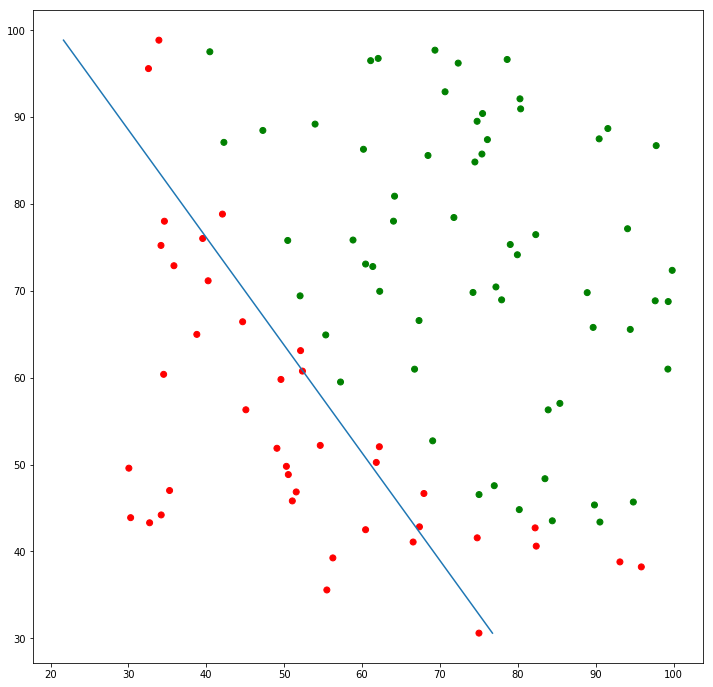

In [16]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

data = np.loadtxt('exam_score.csv', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)

logit = linear_model.LogisticRegression()
logit.fit(x, y)

color = ['red', 'green']
y_color = [color[i] for i in y]

plt.figure(figsize=(12, 12))
plt.scatter(x[:,0], x[:,1], c=y_color)
plt.plot((- logit.coef_[0][1] * np.array((min(x[:,1]), max(x[:,1]))) - logit.intercept_[0]) / logit.coef_[0][0], np.array((min(x[:,1]), max(x[:,1]))))
plt.show()

# Class Probabilities Contour

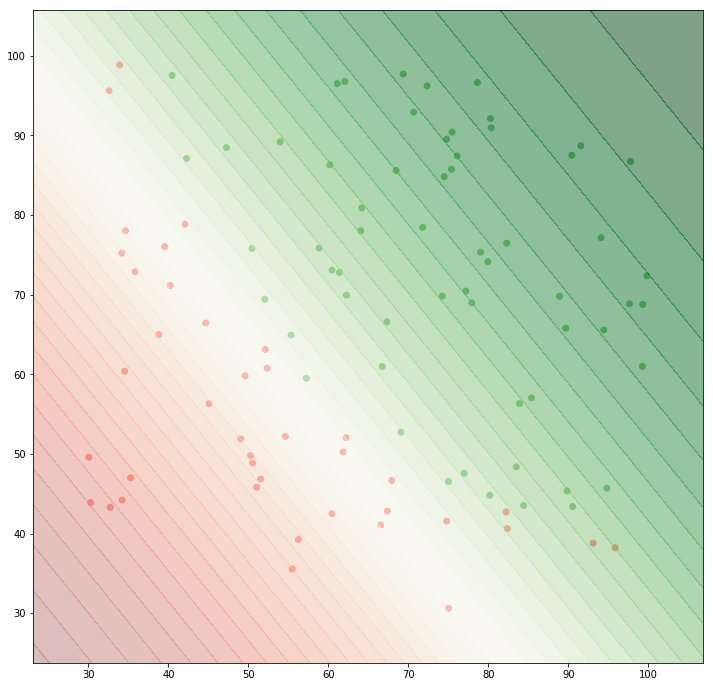

In [17]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_proba = logit.predict_proba(mesh_data).reshape(steps, steps, 2)

contour_color = [plt.cm.Reds, plt.cm.Greens]

plt.figure(figsize=(12, 12))
plt.scatter(x[:,0], x[:,1], c=y_color)
for i in range(2):
    plt.contourf(xx0, xx1, np.maximum(mesh_proba[:,:,i], 0.5), 20, cmap=contour_color[i], alpha=0.5)

plt.show()

# 3D Visualization

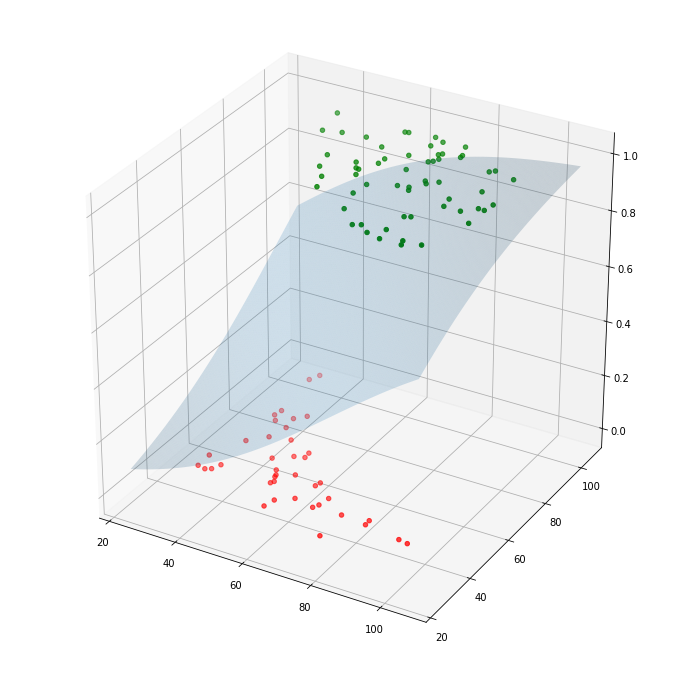

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection = '3d')
ax.scatter(x[:,0], x[:,1], y, c=y_color)
ax.plot_surface(xx0, xx1, mesh_proba[:,:,1], rstride=1, cstride=1, alpha=0.2)
plt.show()

# PI approximation and complexity

In [19]:
def cal_cont_frac (seq):
    if len(seq) == 0:
        return 0, 1
    elif len(seq) == 1:
        return seq[0], 1
    else:
        for i in range(-1, -len(seq) - 1, -1):
            if i == -1:
                nu, de = seq[i], 1
            else:
                nu, de = seq[i] * nu + de, nu
        return nu, de

def cont_frac (val, count, seq):
    if count == 0 or val == 0.0:
        return
    f = 1.0 / val
    fl = int(np.floor(f))
    seq.append(fl)
    return cont_frac (f - fl, count - 1, seq)

pi = np.longfloat(np.pi)
seq = [3]
cont_frac(pi - 3, 20, seq)
for i in range(1, 21):
    nu, de = cal_cont_frac(seq[:i])
    err = abs(pi - np.longfloat(nu) / np.longfloat(de))
    print('error: %.6e; total length of numerator and denominator: %d; = %d / %d' % (err, len(str(nu)) + len(str(de)), nu, de))

error: 1.415927e-01; total length of numerator and denominator: 2; = 3 / 1
error: 1.264489e-03; total length of numerator and denominator: 3; = 22 / 7
error: 8.321963e-05; total length of numerator and denominator: 6; = 333 / 106
error: 2.667642e-07; total length of numerator and denominator: 6; = 355 / 113
error: 5.778906e-10; total length of numerator and denominator: 11; = 103993 / 33102
error: 3.316281e-10; total length of numerator and denominator: 11; = 104348 / 33215
error: 1.223563e-10; total length of numerator and denominator: 11; = 208341 / 66317
error: 2.914335e-11; total length of numerator and denominator: 11; = 312689 / 99532
error: 8.715251e-12; total length of numerator and denominator: 12; = 833719 / 265381
error: 1.610712e-12; total length of numerator and denominator: 13; = 1146408 / 364913
error: 4.041212e-13; total length of numerator and denominator: 14; = 4272943 / 1360120
error: 2.220446e-14; total length of numerator and denominator: 14; = 5419351 / 1725033
er

# Logistic Regression with different trade-off parameters

accuracy for training data at C=1.000000 is 0.800000
accuracy for test data at C=1.000000 is 0.760000
model complexity: 0.034791114281377766
accuracy for training data at C=2.000000 is 0.840000
accuracy for test data at C=2.000000 is 0.860000
model complexity: 0.0489814849192567
accuracy for training data at C=5.000000 is 0.900000
accuracy for test data at C=5.000000 is 0.940000
model complexity: 0.07403645731502027
accuracy for training data at C=10.000000 is 0.900000
accuracy for test data at C=10.000000 is 0.920000
model complexity: 0.09731969039745683


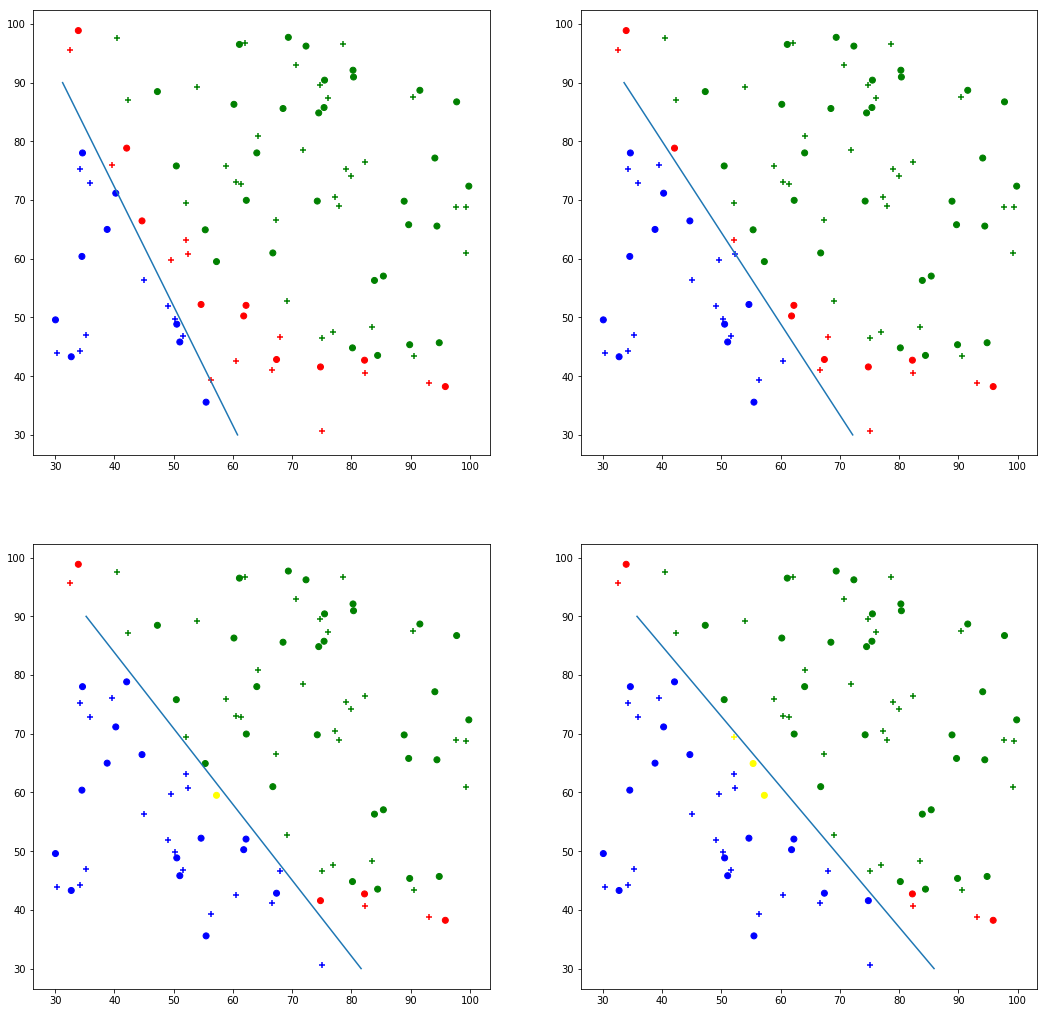

In [20]:
import numpy as np
from sklearn import linear_model, metrics, model_selection
import matplotlib.pyplot as plt

data = np.loadtxt('exam_score.csv', delimiter = ',')
x_train, x_test, y_train, y_test = model_selection.train_test_split (data[:,:2], data[:,2].astype(int), test_size = 0.5, random_state = 2018)

plt.figure(figsize = (18,18))
C = [1, 2, 5, 10]
for i in range(4):
    plt.subplot(2, 2, i+1)
    logit = linear_model.LogisticRegression(C=C[i])
    logit.fit(x_train, y_train)
    y_train_pred = logit.predict(x_train)
    y_test_pred = logit.predict(x_test)
    color = [['blue', 'red'], ['yellow', 'green']]
    print('accuracy for training data at C=%f is %f' % (C[i], metrics.accuracy_score(y_train, y_train_pred)))
    print('accuracy for test data at C=%f is %f' % (C[i], metrics.accuracy_score(y_test, y_test_pred)))
    print('model complexity:', np.sqrt(np.square(logit.coef_[0][0]) + np.square(logit.coef_[0][1])))
    plt.scatter(x_train[:,0], x_train[:,1], c=[color[j1][j2] for j1, j2 in zip(y_train, y_train_pred)], marker='o')
    plt.scatter(x_test[:,0], x_test[:,1], c=[color[j1][j2] for j1, j2 in zip(y_test, y_test_pred)], marker='+')
    plt.plot((- logit.coef_[0][1] * np.array((30,90)) - logit.intercept_[0]) / logit.coef_[0][0], np.array((30,90)))

plt.show()